In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

from main import *
from multiprocessing import Pool
import pandas as pd

colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

SAVE_PATH = r"E:\MS_ExperimentData\general"
MP4_PATH = r"E:\MS_ExperimentData\mp4"

In [4]:
omegaMins = np.linspace(0.1, 3, 21)
phaseLags = np.linspace(-1, 1, 21) * np.pi
randomSeed = 10
strengthLambda = 0.15 * 32 * 2
distanceD0 = 1
deltaOmega = 1
boundaryLength = 7
agnetsCount = 1000
halfAgentsNum = agnetsCount // 2
Homega = np.block([
    [np.ones((halfAgentsNum, halfAgentsNum)), np.zeros((halfAgentsNum, halfAgentsNum))],
    [np.zeros((halfAgentsNum, halfAgentsNum)), np.ones((halfAgentsNum, halfAgentsNum))]
])

SAVE_PATH = "./data"  # r"E:\MS_ExperimentData\general"

In [17]:
lastStatePath = (
    f"./last_state/MeanFieldChiralInducedPhaseLag_lastState"
    f"_l{strengthLambda}_d{distanceD0}_dO{deltaOmega}_rS{randomSeed}.h5"
)

totalPositionX = pd.read_hdf(lastStatePath, key="positionX")
totalPhaseTheta = pd.read_hdf(lastStatePath, key="phaseTheta")
totalDotTheta = pd.read_hdf(lastStatePath, key="pointTheta")

modelNums = totalPositionX.shape[0] // (halfAgentsNum * 2)

totalPositionX = totalPositionX.values.reshape(modelNums, agnetsCount, 2)
totalPhaseTheta = totalPhaseTheta.values.reshape(modelNums, agnetsCount)
totalDotTheta = totalDotTheta.values.reshape(modelNums, agnetsCount)

positionXs, phaseThetas, dotThetas = {}, {}, {}

for idx, (omegaMin, phaseLag) in enumerate(product(omegaMins.round(2), phaseLags.round(2))):
    positionXs[(omegaMin, phaseLag)] = totalPositionX[idx]
    phaseThetas[(omegaMin, phaseLag)] = totalPhaseTheta[idx]
    dotThetas[(omegaMin, phaseLag)] = totalDotTheta[idx]

In [16]:
phaseLags.round(2)

array([-3.14, -2.83, -2.51, -2.2 , -1.88, -1.57, -1.26, -0.94, -0.63,
       -0.31,  0.  ,  0.31,  0.63,  0.94,  1.26,  1.57,  1.88,  2.2 ,
        2.51,  2.83,  3.14])

In [19]:
positionXs.keys()

dict_keys([(0.1, -3.14), (0.1, -2.83), (0.1, -2.51), (0.1, -2.2), (0.1, -1.88), (0.1, -1.57), (0.1, -1.26), (0.1, -0.94), (0.1, -0.63), (0.1, -0.31), (0.1, 0.0), (0.1, 0.31), (0.1, 0.63), (0.1, 0.94), (0.1, 1.26), (0.1, 1.57), (0.1, 1.88), (0.1, 2.2), (0.1, 2.51), (0.1, 2.83), (0.1, 3.14), (0.24, -3.14), (0.24, -2.83), (0.24, -2.51), (0.24, -2.2), (0.24, -1.88), (0.24, -1.57), (0.24, -1.26), (0.24, -0.94), (0.24, -0.63), (0.24, -0.31), (0.24, 0.0), (0.24, 0.31), (0.24, 0.63), (0.24, 0.94), (0.24, 1.26), (0.24, 1.57), (0.24, 1.88), (0.24, 2.2), (0.24, 2.51), (0.24, 2.83), (0.24, 3.14), (0.39, -3.14), (0.39, -2.83), (0.39, -2.51), (0.39, -2.2), (0.39, -1.88), (0.39, -1.57), (0.39, -1.26), (0.39, -0.94), (0.39, -0.63), (0.39, -0.31), (0.39, 0.0), (0.39, 0.31), (0.39, 0.63), (0.39, 0.94), (0.39, 1.26), (0.39, 1.57), (0.39, 1.88), (0.39, 2.2), (0.39, 2.51), (0.39, 2.83), (0.39, 3.14), (0.53, -3.14), (0.53, -2.83), (0.53, -2.51), (0.53, -2.2), (0.53, -1.88), (0.53, -1.57), (0.53, -1.26), (0.

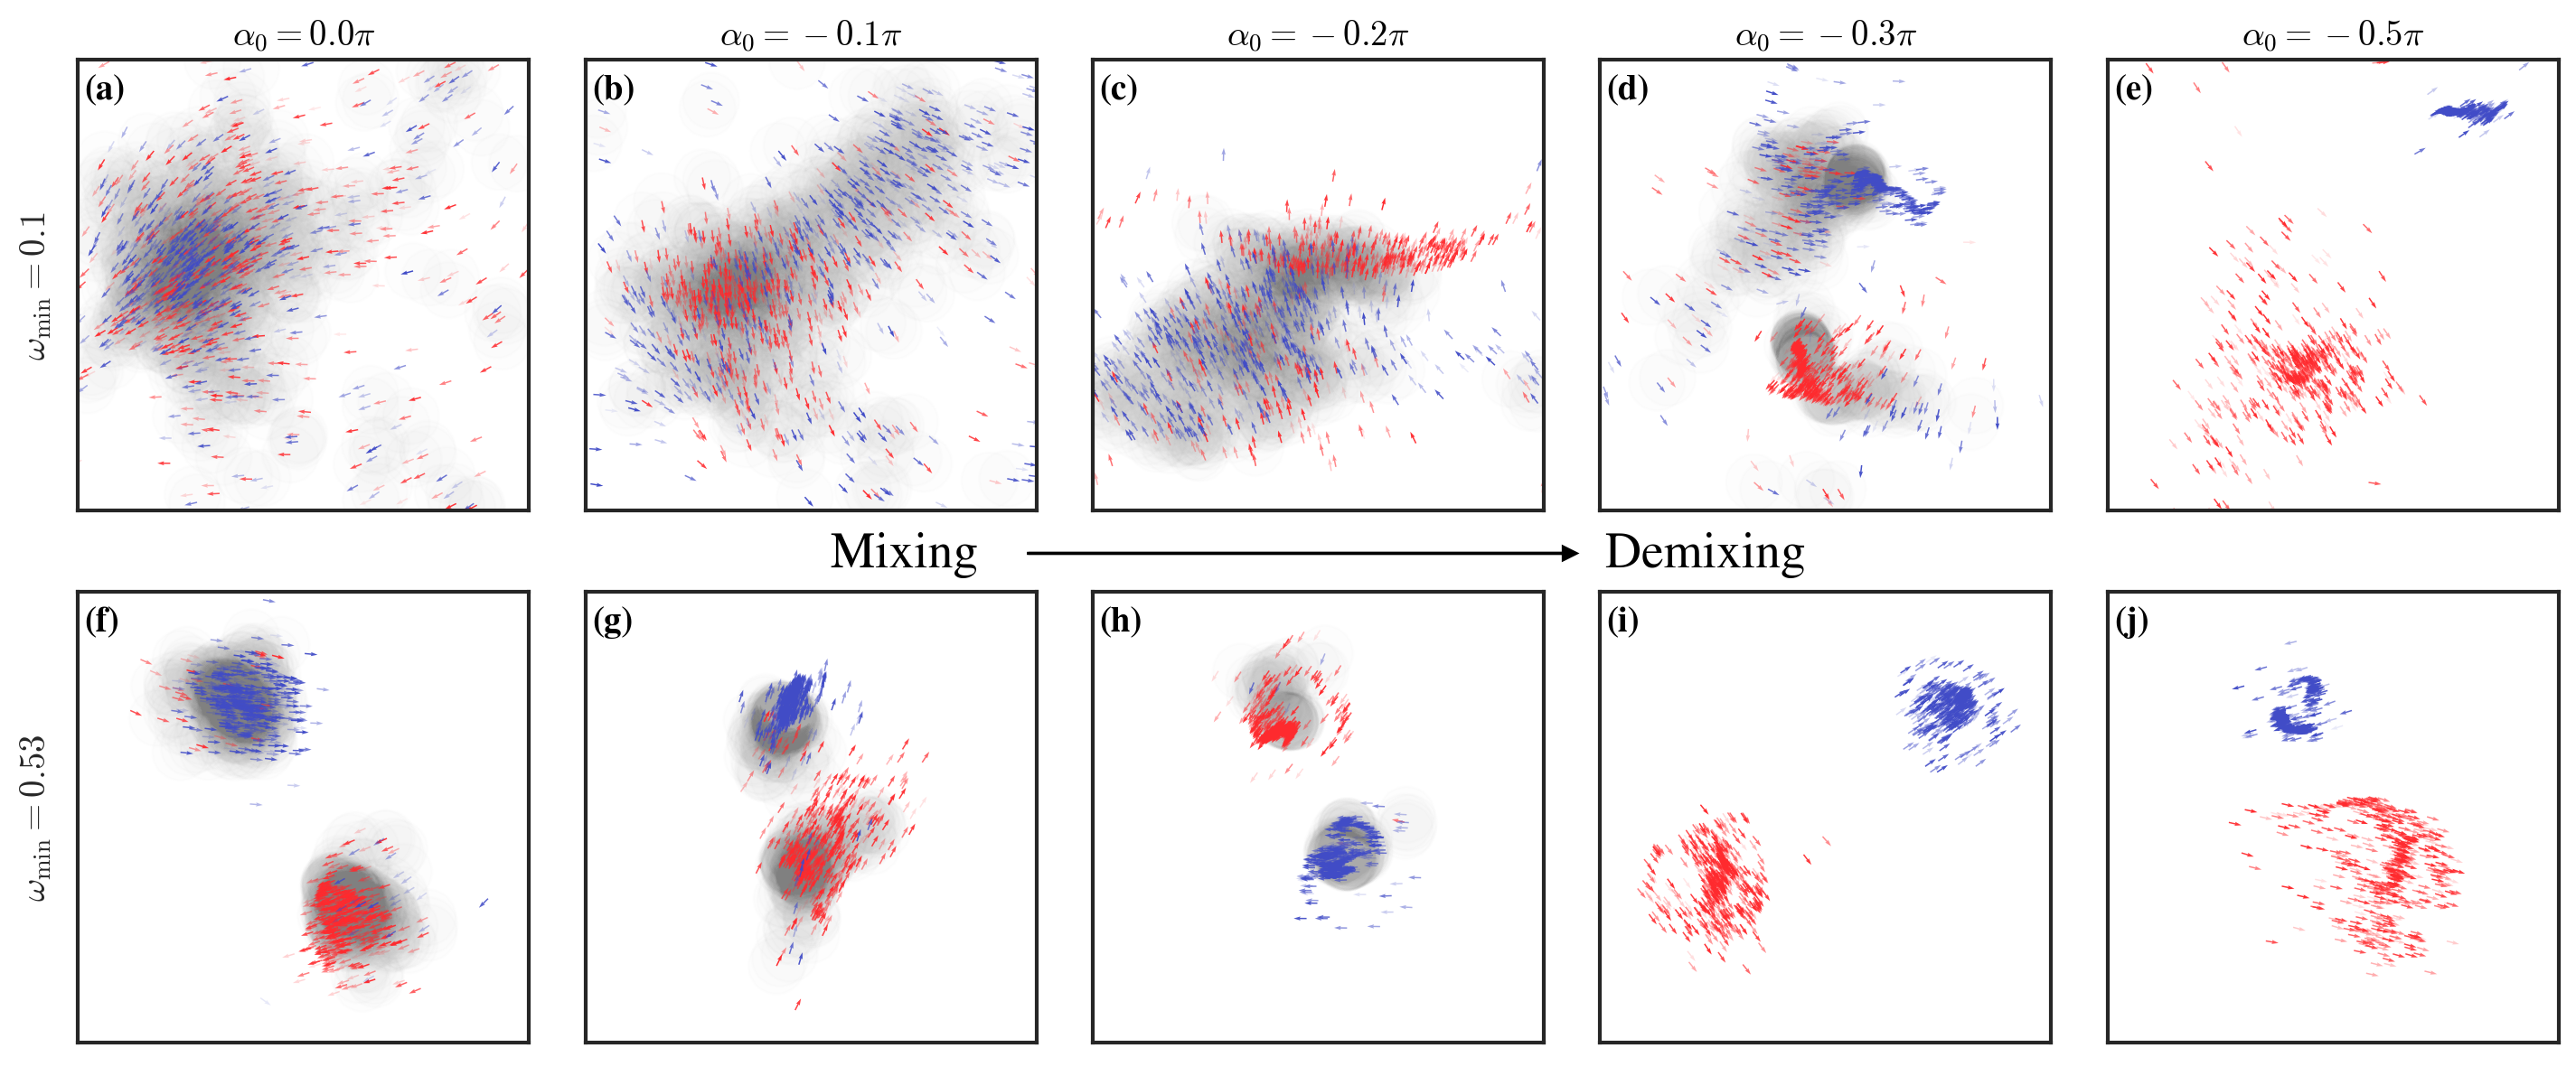

In [190]:
selectedOmegaMins = [0.1, 0.53]
selectedPhaseLags = (np.array([0, -0.1, -0.2, -0.3, -0.5]) * np.pi).round(2)
shiftXs = [0,  0, 3, 3, 3,    2,   -1,  0, -0.5,    0]
shiftYs = [0, -2, 1, 2, 0, -0.5, -1.5, -2, -0.5, -0.5]

fig, axs = plt.subplots(2, 5, figsize=(14.5, 6))
axs = axs.flatten()

for idx, (omegaMin, phaseLag) in enumerate(product(selectedOmegaMins, selectedPhaseLags)):
    positionX = positionXs[(omegaMin, phaseLag)].copy()
    phaseTheta = phaseThetas[(omegaMin, phaseLag)]

    positionX[:, 0] = np.mod(positionX[:, 0] + shiftXs[idx], boundaryLength)
    positionX[:, 1] = np.mod(positionX[:, 1] + shiftYs[idx], boundaryLength)
    omegaMax = omegaMin + deltaOmega
    omegaTheta = np.concatenate([
        np.random.uniform(omegaMin, omegaMax, size=500),
        np.random.uniform(-omegaMax, -omegaMin, size=500)
    ])
    deltaX = MeanFieldChiralInducedPhaseLag._delta_x(
        positionX, positionX[:, np.newaxis], boundaryLength, boundaryLength / 2
    )
    Aij = MeanFieldChiralInducedPhaseLag.distance_x(deltaX) <= 0.3
    hasAround = np.sign(((1 - Homega) * Aij).sum(axis=0))

    ax = axs[idx]
    ax.scatter(
        positionX[:, 0], positionX[:, 1], alpha=0.01, zorder=0, s=500,
        color=list(map(lambda x: "grey" if x == 1 else "#FFFFFF", hasAround)),
    )
    scale = 35
    width = 0.003
    alphaRate = 0.9
    ax.quiver(
        positionX[:halfAgentsNum, 0], positionX[:halfAgentsNum, 1],
        np.cos(phaseTheta[:halfAgentsNum]), np.sin(phaseTheta[:halfAgentsNum]), color="#FF2A2E", 
        alpha = (1 - alphaRate) + (np.abs(omegaTheta[:halfAgentsNum]) - omegaMin) / deltaOmega * alphaRate,
        scale=scale, width=width
    )
    ax.quiver(
        positionX[halfAgentsNum:, 0], positionX[halfAgentsNum:, 1],
        np.cos(phaseTheta[halfAgentsNum:]), np.sin(phaseTheta[halfAgentsNum:]), color="#414CC7",
        alpha = (1 - alphaRate) + (np.abs(omegaTheta[:halfAgentsNum]) - omegaMin) / deltaOmega * alphaRate,
        scale=scale, width=width
    )
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    ax.set_xlim(0, boundaryLength)
    ax.set_ylim(0, boundaryLength)
    if idx % 5 == 0:
        ax.set_ylabel(rf"$\omega_{{\min}}={omegaMin}$", fontsize=14)
    if idx < 5:
        ax.set_title(rf"$\alpha_0={phaseLag / np.pi:.1f}\pi$", fontsize=14)
    ax.text(0.1, 6.4, f"({chr(97 + idx)})", fontsize=14, fontweight="bold")
    ax.set_aspect("equal")

axs[7].set_title(rf"Mixing{' ' * 50}Demixing", fontsize=20, pad=10)

plt.tight_layout()
axs[7].arrow(-1, 7.6, 8.3, 0, head_width=0.2, head_length=0.2, lw=1.2, fc="black", ec="black", clip_on=False)

plt.savefig("./PCT_C_figs/snapshots.pdf", bbox_inches="tight")